In [1]:
import gzip
import zipfile
import shutil
import os
import idx2numpy
from PIL import Image, ImageOps

In [2]:
# zip_path = './data/zipped/gzip.zip'
# extract_path = './data/unzipped'

In [3]:
# with zipfile.ZipFile(zip_path, 'r') as zip_re:
#     zip_re.extractall(extract_path)

In [4]:
# gzip_files = [
#     'emnist-digits-train-images-idx3-ubyte.gz',
#     'emnist-digits-train-labels-idx1-ubyte.gz',
#     'emnist-digits-test-images-idx3-ubyte.gz',
#     'emnist-digits-test-labels-idx1-ubyte.gz'
# ]
# 
# extracted_folder = './decompressed_files'
# os.makedirs(extracted_folder, exist_ok=True)
# 
# for gz_file in gzip_files:
#     with gzip.open(os.path.join('./data/unzipped/gzip', gz_file), 'rb') as f_in:
#         out_filename = os.path.join(extracted_folder, gz_file[:-3])
#         with open(out_filename, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)
#     print(f"Decompressed {gz_file} to {out_filename}")

In [5]:
decompressed_path = "./decompressed_files"

In [6]:
train_images = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-test-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file(f'{decompressed_path}/emnist-digits-test-labels-idx1-ubyte')

print('Training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

Training images shape: (240000, 28, 28)
Training labels shape: (240000,)


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from utils import show_images
from utils import show_image

from models import fullyConnectedModel
from models import CnnModel

from dataset import MyDataset

In [9]:
num_epochs = 1
batch_size = 32
learning_rate = 0.001

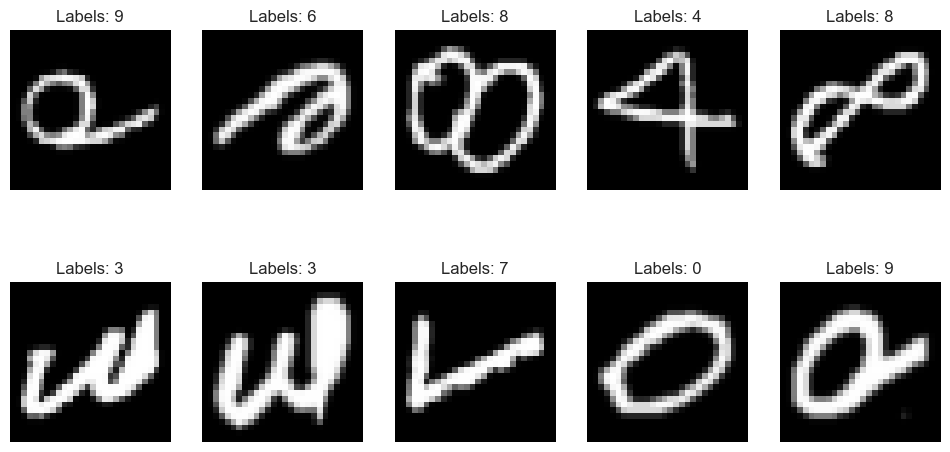

In [10]:
show_images(train_images[10:20], train_labels[10:20], 10)

In [11]:
train_images[0].shape

(28, 28)

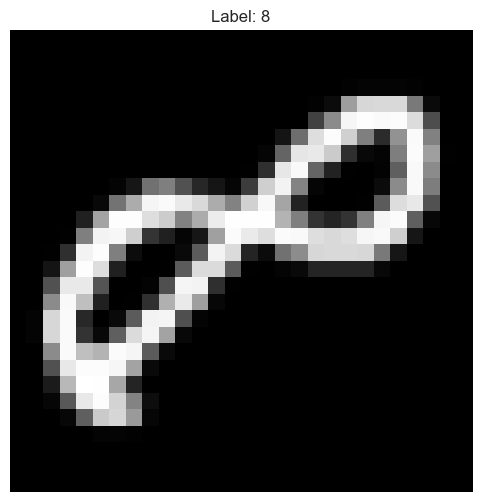

In [12]:
show_image(train_images[14], train_labels[14])

In [13]:
train_images[0].shape

(28, 28)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [15]:
transform = transforms.ToTensor()

In [16]:
train_dataset = MyDataset(X_train, y_train, transform=transform)
test_dataset = MyDataset(X_test, y_test, transform=transform)

In [17]:
model = fullyConnectedModel()

In [18]:
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(),lr=0.001)

In [20]:
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for image, label in train_loader:
        optimizer.zero_grad()
        out = model(image)
        loss = loss_fn(out,label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, pred = torch.max(out,1)
        correct += (pred == label).sum().item()
        total += label.size(0) 
    acc = correct/total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}, Accuracy: {acc}")
    

Epoch 1/1, Loss: 0.28990942110307516, Accuracy: 0.9232291666666667


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        out = model(images)
        _, pred = torch.max(out, 1)
        correct += (pred == labels).sum().item()  
        total += labels.size(0)

    acc = correct / total

print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9390


In [22]:
cnn_model = CnnModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

In [23]:
for epoch in range(num_epochs):
    cnn_model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for image, label in train_loader:
        optimizer.zero_grad()
        out = cnn_model(image)
        loss = loss_fn(out,label)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, pred = torch.max(out,1)
        correct += (pred == label).sum().item()
        total += label.size(0) 
    acc = correct/total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}, Accuracy: {acc}")

Epoch 1/1, Loss: 0.10049374095056555, Accuracy: 0.9709635416666667


In [24]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        out = cnn_model(images)
        _, pred = torch.max(out, 1)
        correct += (pred == labels).sum().item()  
        total += labels.size(0)

    acc = correct / total

print(f"Test Accuracy: {acc:.4f}") 

Test Accuracy: 0.9839


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4852
           1       0.94      0.98      0.96      4775
           2       0.92      0.95      0.93      4806
           3       0.92      0.93      0.92      4765
           4       0.93      0.94      0.93      4851
           5       0.94      0.90      0.92      4857
           6       0.97      0.97      0.97      4769
           7       0.95      0.94      0.95      4664
           8       0.93      0.90      0.91      4918
           9       0.92      0.93      0.93      4743

    accuracy                           0.94     48000
   macro avg       0.94      0.94      0.94     48000
weighted avg       0.94      0.94      0.94     48000



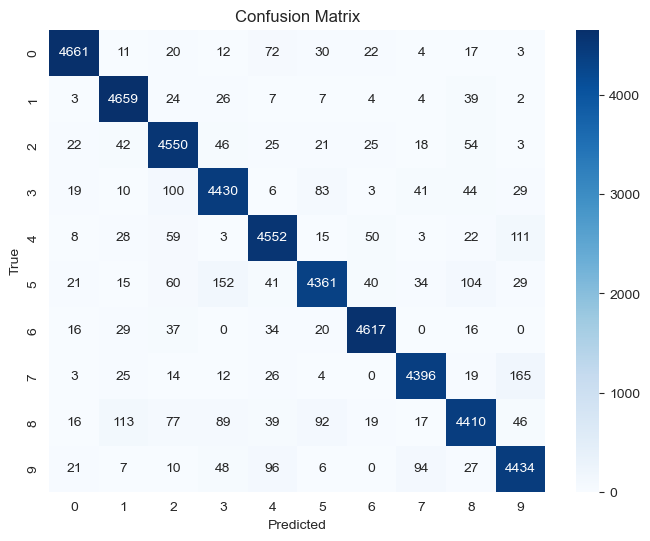

In [25]:
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4852
           1       0.99      0.99      0.99      4775
           2       0.97      0.99      0.98      4806
           3       0.99      0.99      0.99      4765
           4       0.98      0.98      0.98      4851
           5       0.99      0.99      0.99      4857
           6       0.99      0.99      0.99      4769
           7       0.97      0.99      0.98      4664
           8       0.99      0.97      0.98      4918
           9       0.98      0.97      0.97      4743

    accuracy                           0.98     48000
   macro avg       0.98      0.98      0.98     48000
weighted avg       0.98      0.98      0.98     48000



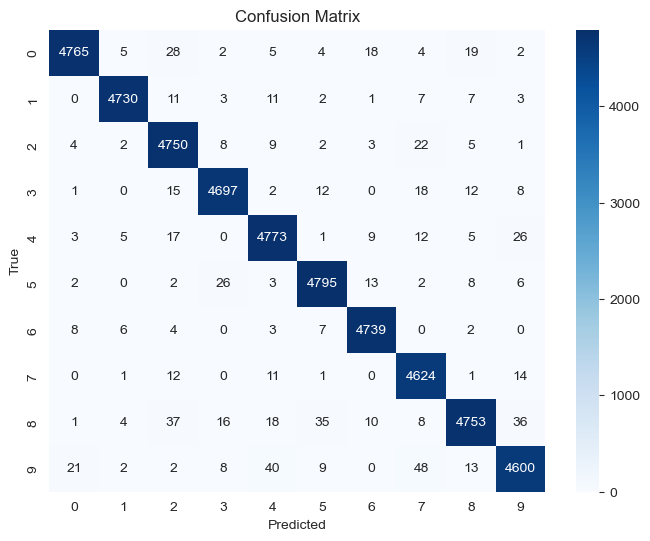

In [26]:
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## My images

In [27]:
my_labels = np.array([0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9])

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [29]:
def load_images(folder, transform):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L') 
            
            if transform:
                img = transform(img)
            
            data.append(img)
    
    return torch.stack(data)

In [30]:
images = load_images("my_images", transform)

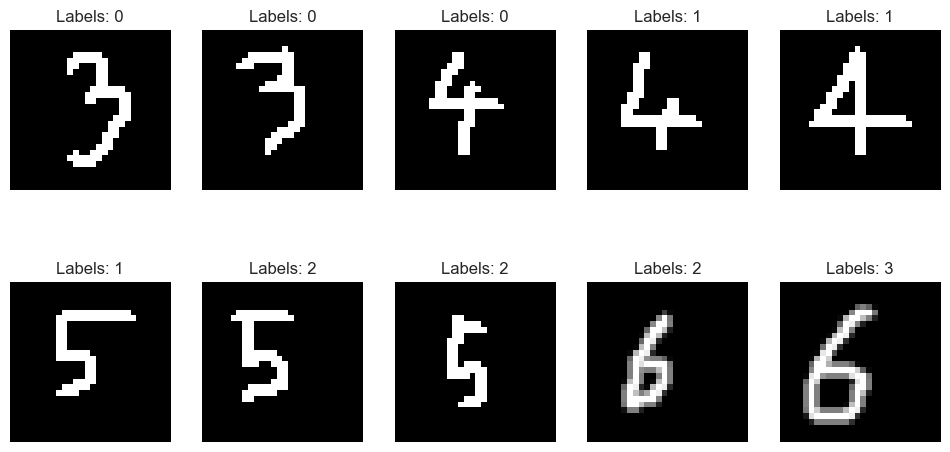

In [32]:
show_images(images[10:], my_labels[:10], 10)

In [33]:
print(torch.tensor((my_labels)))

tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7,
        8, 8, 8, 9, 9, 9])


In [34]:
image_dataset = MyDataset(images,torch.tensor(my_labels)) 
image_loader = DataLoader(dataset=image_dataset, batch_size=1, shuffle=False)

In [35]:
correct = 0
total = 0
with torch.no_grad():
    for image, labels in image_loader:
        out = model(image)
        _, pred = torch.max(out, 1)
        print(pred)
        print(labels)

        correct += (pred == labels).sum().item()  
        total += labels.size(0)

    acc = correct / total

print(f"Test Accuracy: {acc:.4f}") 

tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([1])
tensor([1])
tensor([1])
tensor([1])
tensor([1])
tensor([1])
tensor([9])
tensor([2])
tensor([9])
tensor([2])
tensor([4])
tensor([2])
tensor([4])
tensor([3])
tensor([6])
tensor([3])
tensor([4])
tensor([3])
tensor([1])
tensor([4])
tensor([1])
tensor([4])
tensor([9])
tensor([4])
tensor([9])
tensor([5])
tensor([9])
tensor([5])
tensor([9])
tensor([5])
tensor([9])
tensor([6])
tensor([9])
tensor([6])
tensor([9])
tensor([6])
tensor([1])
tensor([7])
tensor([1])
tensor([7])
tensor([1])
tensor([7])
tensor([9])
tensor([8])
tensor([0])
tensor([8])
tensor([9])
tensor([8])
tensor([9])
tensor([9])
tensor([9])
tensor([9])
tensor([9])
tensor([9])
Test Accuracy: 0.3000


In [36]:
correct = 0
total = 0
with torch.no_grad():
    for image, labels in image_loader:
        out = cnn_model(image)
        _, pred = torch.max(out, 1)
        print(pred)
        print(labels)
        correct += (pred == labels).sum().item()  
        total += labels.size(0)

    acc = correct / total

print(f"Test Accuracy: {acc:.4f}")

tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([0])
tensor([4])
tensor([1])
tensor([4])
tensor([1])
tensor([4])
tensor([1])
tensor([4])
tensor([2])
tensor([4])
tensor([2])
tensor([4])
tensor([2])
tensor([4])
tensor([3])
tensor([0])
tensor([3])
tensor([4])
tensor([3])
tensor([4])
tensor([4])
tensor([7])
tensor([4])
tensor([4])
tensor([4])
tensor([4])
tensor([5])
tensor([4])
tensor([5])
tensor([4])
tensor([5])
tensor([4])
tensor([6])
tensor([7])
tensor([6])
tensor([7])
tensor([6])
tensor([4])
tensor([7])
tensor([4])
tensor([7])
tensor([4])
tensor([7])
tensor([4])
tensor([8])
tensor([0])
tensor([8])
tensor([4])
tensor([8])
tensor([4])
tensor([9])
tensor([4])
tensor([9])
tensor([4])
tensor([9])
Test Accuracy: 0.1667


C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.38      1.00      0.55         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.21      1.00      0.35         3

    accuracy                           0.30        30
   macro avg       0.13      0.30      0.18        30
weighted avg       0.13      0.30      0.18        30



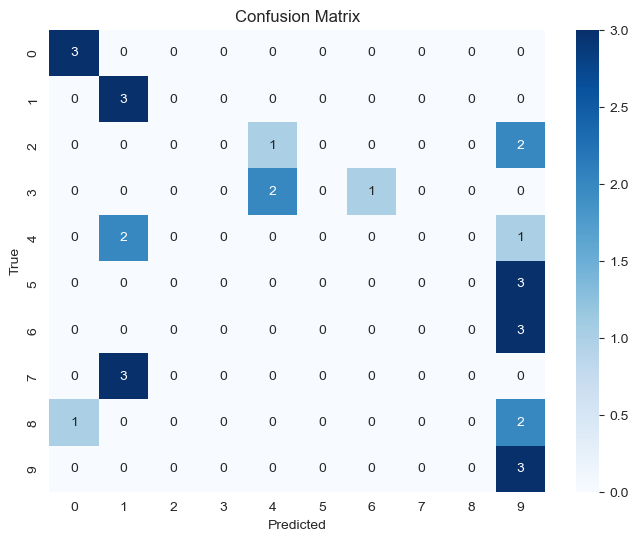

In [37]:
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in image_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JS\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.09      0.67      0.16         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3

    accuracy                           0.17        30
   macro avg       0.07      0.17      0.09        30
weighted avg       0.07      0.17      0.09        30



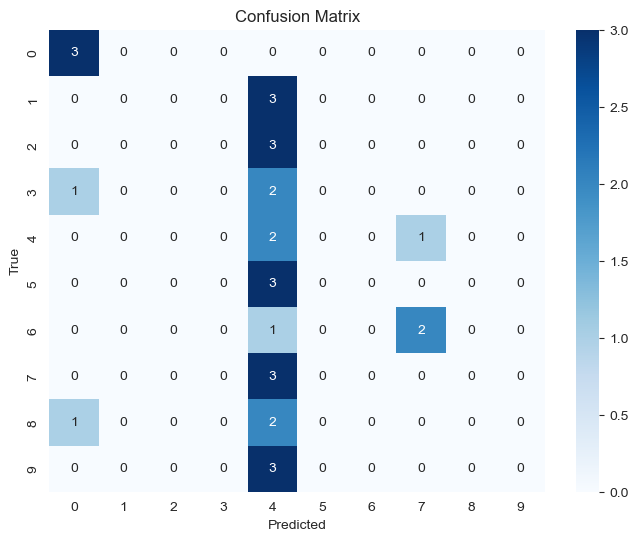

In [38]:
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in image_loader:
        outputs = cnn_model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()